In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
prophet_results = pd.read_csv('/Users/jinny/Documents/touristcast/SARIMAX/Prophet_error_crossval.csv', index_col=0)
prophet_results.drop_duplicates(inplace=True)
sarimax_results = pd.read_csv('/Users/jinny/Documents/touristcast/SARIMAX/SARIMAX_error_crossval.csv', index_col=0)
var_results = pd.read_csv('/Users/jinny/Documents/touristcast/VAR/CV/VAR_final-models.csv', index_col=0)
var_results.drop(['with_gdp'], axis=1, inplace=True)

In [3]:
sarimax_results[(sarimax_results.periods==6)].sort_values('region', ascending=True)

,region,periods,MAE,RMSE,Max_error,MASE
19,ARA,6,159.617907,171.255204,0.111564,1.791547
49,BFC,6,23.469633,28.539332,0.062783,1.288832
34,BRE,6,19.633227,23.051669,0.047200,1.089021
44,COR,6,14.342276,20.700874,0.067521,1.216048
4,CVL,6,10.338523,12.563125,0.037208,0.783964
54,GES,6,38.962458,47.011740,0.060079,1.040872
59,HDF,6,23.815602,25.328243,0.048061,0.876245
9,IDF,6,375.625724,472.244186,0.166889,0.662945
14,NAQ,6,38.707675,50.596005,0.048897,0.899481
64,NOR,6,33.464692,41.325192,0.089090,1.076064


In [4]:
prophet_results[(prophet_results.periods==6)].sort_values('region', ascending=True)

,region,periods,MAE,RMSE,Max_error,MASE
24,ARA,6,63.475497,85.720561,0.076038,0.712447
54,BFC,6,34.759303,40.855694,0.084417,1.908803
39,BRE,6,25.836604,31.524127,0.060442,1.433111
49,COR,6,194.295960,207.947217,0.460449,16.473903
4,CVL,6,13.605493,17.778427,0.053119,1.031696
59,GES,6,39.669351,42.394969,0.049194,1.059757
64,HDF,6,22.252354,25.839700,0.054282,0.818728
9,IDF,6,410.888202,481.529319,0.159297,0.725180
19,NAQ,6,46.700382,52.557371,0.032421,1.085214
69,NOR,6,28.021489,33.449849,0.060964,0.901037


In [5]:
var_results[(var_results.periods==6)].sort_values('region', ascending=True)

,region,trend_model,lag,periods,MAE,RMSE,Max_error,MASE
0,ARA,ARIMA,12,6,63.286742,80.472928,0.062823,3.775090
1,BFC,ARIMA,13,6,39.476622,51.865493,0.112871,11.881471
2,BRE,ARIMA,14,6,792.522575,1045.333759,2.921451,11.827544
3,COR,Holt,1,6,14.002876,17.782025,0.048802,19.701594
4,CVL,ARIMA,1,6,13.234664,16.714164,0.043430,15.379914
5,GES,ARIMA,10,6,53.456918,56.764360,0.064634,10.929462
6,HDF,ARIMA,13,6,33.738146,41.164526,0.082961,7.380053
7,IDF,ARIMA,15,6,1576.923387,1893.730052,0.662676,0.910769
8,NAQ,ARIMA,14,6,94.397231,112.186703,0.101138,14.136005
9,NOR,ARIMA,15,6,53.943097,65.530187,0.141939,8.435698


### MASE comparison
- SARIMAX and Prophet were largely comparable or better than seasonal naive
- VAR was only better than seasonal naive for predicting 2017 nights in IDF
- Red line is the seasonal naive MASE (1.0)

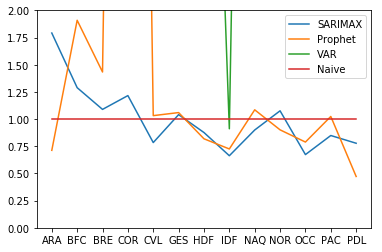

In [6]:
sarimax_mase = pd.DataFrame(sarimax_results.query('periods==6').MASE)
sarimax_mase.index = sarimax_results.query('periods==6').region
sarimax_mase.columns = ['SARIMAX']

prophet_mase = pd.DataFrame(prophet_results.query('periods==6').MASE)
prophet_mase.index = prophet_results.query('periods==6').region
prophet_mase.columns = ['Prophet']

var_mase = pd.DataFrame(var_results.query('periods==6').MASE)
var_mase.index = var_results.query('periods==6').region
var_mase.columns = ['VAR']

mase = pd.concat([sarimax_mase, prophet_mase, var_mase], axis=1, sort=True)
mase

fig, ax = plt.subplots()
mase.plot(ax=ax)
ax.plot([1] * var_mase.index.size, label='Naive')
ax.set_ylim(0,2)
ax.set_xticks(list(range(var_mase.index.size)))
ax.set_xticklabels(var_mase.index)
plt.legend();

### RMSE comparison
- SARIMAX and Prophet were mostly under 500 nights of error
- All models had a big jump in error for IDF

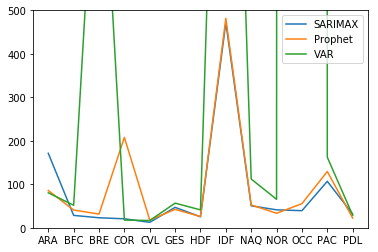

In [7]:
sarimax_rmse = pd.DataFrame(sarimax_results.query('periods==6').RMSE)
sarimax_rmse.index = sarimax_results.query('periods==6').region
sarimax_rmse.columns = ['SARIMAX']

prophet_rmse = pd.DataFrame(prophet_results.query('periods==6').RMSE)
prophet_rmse.index = prophet_results.query('periods==6').region
prophet_rmse.columns = ['Prophet']

var_rmse = pd.DataFrame(var_results.query('periods==6').RMSE)
var_rmse.index = var_results.query('periods==6').region
var_rmse.columns = ['VAR']

rmse = pd.concat([sarimax_rmse, prophet_rmse, var_rmse], axis=1, sort=True)
rmse

fig, ax = plt.subplots()
rmse.plot(ax=ax)
ax.set_ylim(0,500)
ax.set_xticks(list(range(var_rmse.index.size)))
ax.set_xticklabels(var_rmse.index)
plt.legend();

### Max error comparison
- All models were mostly under 50% max error (except VAR)

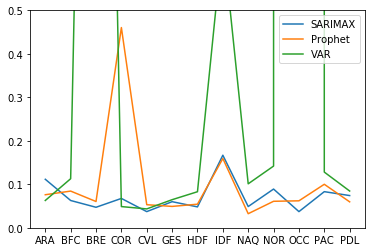

In [8]:
sarimax_max_error = pd.DataFrame(sarimax_results.query('periods==6').Max_error)
sarimax_max_error.index = sarimax_results.query('periods==6').region
sarimax_max_error.columns = ['SARIMAX']

prophet_max_error = pd.DataFrame(prophet_results.query('periods==6').Max_error)
prophet_max_error.index = prophet_results.query('periods==6').region
prophet_max_error.columns = ['Prophet']

var_max_error = pd.DataFrame(var_results.query('periods==6').Max_error)
var_max_error.index = var_results.query('periods==6').region
var_max_error.columns = ['VAR']

max_error = pd.concat([sarimax_max_error, prophet_max_error, var_max_error], axis=1, sort=True)
max_error

fig, ax = plt.subplots()
max_error.plot(ax=ax)
ax.set_ylim(0,0.5)
ax.set_xticks(list(range(var_max_error.index.size)))
ax.set_xticklabels(var_max_error.index)
plt.legend();

### Best model for each region
- Based on minimum MASE with 6 periods of training data predicting 2017

In [9]:
{ index: row.idxmin() for index, row in mase.iterrows() }

{'ARA': 'Prophet',
 'BFC': 'SARIMAX',
 'BRE': 'SARIMAX',
 'COR': 'SARIMAX',
 'CVL': 'SARIMAX',
 'GES': 'SARIMAX',
 'HDF': 'Prophet',
 'IDF': 'SARIMAX',
 'NAQ': 'SARIMAX',
 'NOR': 'Prophet',
 'OCC': 'SARIMAX',
 'PAC': 'SARIMAX',
 'PDL': 'Prophet'}